In [1]:
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np

In [2]:

transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,)),
                                ])
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_dataset_normalize = datasets.MNIST(root='./data', train=True, download=True, transform=transform)



In [3]:
print(train_dataset.targets.numpy()[0])
y_train = train_dataset.targets.numpy().reshape(-1, 1)
print(y_train[0])

5
[5]


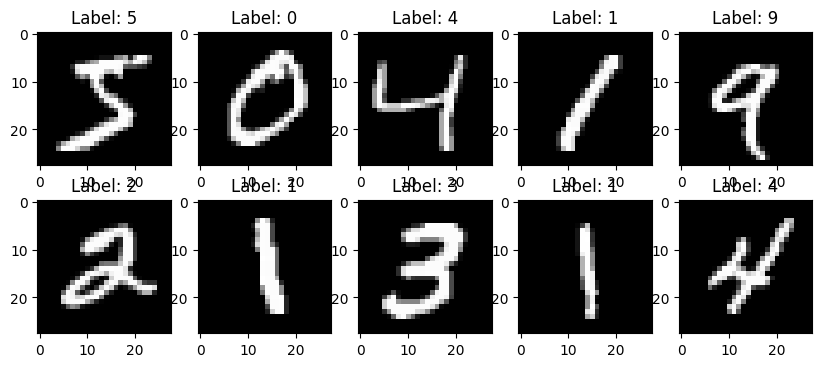

In [4]:
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,)),
                                ])
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

fig, axes = plt.subplots(2, 5, figsize=(10, 4))
for i, ax in enumerate(axes.ravel()):
    image, label = train_dataset[i]
    ax.imshow(image.squeeze().numpy(), cmap='gray')
    ax.set_title(f'Label: {label}')
plt.show()

In [5]:
class LinearLayer:
    def __init__(self, input_size, output_size):
        self.weights = np.random. randn(input_size, output_size) * 0.01
        self.bias = np.zeros ((1, output_size))
        self.weights_error = None
        self.bias_error = None
        self.input = None

    def forward (self, x):
        self.input = x
        return np.dot(x, self.weights) + self.bias

    def backward(self, output_error):
        input_error = np.dot(output_error, self.weights.T)
        self.weights_error = np.dot(self.input.T, output_error)
        self.bias_error = np.sum(output_error, axis=0, keepdims=True)
        return input_error

    def update(self, learning_rate):
        self.weights -= learning_rate * self.weights_error
        self.bias -= learning_rate * self.bias_error

In [18]:
def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=1, keepdims=True)

def binary_cross_entropy(y_pred, y_true):
    eps = 1e-15
    y_pred = np.clip(y_pred, eps, 1-eps) # clip y_pred to prevent log(0) or log(1)
    loss = -(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred)).mean()
    return loss

def binary_cross_entropy_grad(y_pred, y_true):
    eps = 1e-15
    y_pred = np.clip(y_pred, eps, 1-eps) # clip y_pred to prevent division by 0
    grad = (y_pred - y_true) / (y_pred * (1 - y_pred) + eps) # add eps to prevent division by 0
    return grad
def relu(x):
    return np.maximum(0, x)

def relu_grad(x):
    return np.where(x > 0, 1, 0)

def relu_derivative(x):
    return np.where(x > 0, 1, 0)
def mse(y_pred, y_true):
    batch_size = y_pred.shape[0]
    loss = np.sum((y_pred - y_true)**2) / batch_size
    return loss

def mse_grad(y_pred, y_true):
    batch_size = y_pred.shape[0]
    grad = 2 * (y_pred - y_true) / batch_size
    return grad


In [13]:
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.hidden_layer = LinearLayer(input_size, hidden_size)
        self.output_layer = LinearLayer(hidden_size, output_size)

    def forward(self, x):
        hidden_layer_output = self.hidden_layer.forward(x)
        hidden_layer_activation = relu(hidden_layer_output)
        output_layer_output = self.output_layer.forward(hidden_layer_activation)
        output_layer_activation = softmax(output_layer_output)
        return output_layer_activation, hidden_layer_activation

    def backward(self, x, y_true, y_pred, learning_rate) :
        output_error = y_pred - y_true
        grad_output = relu_grad(self.h2) * output_error

        hidden_error = self.output_layer.backward(output_error)

        self.output_layer.update(learning_rate)


    def train(self, X, y, learning_rate=0.1, epochs=19):
        for epoch in range(epochs) :
            for i in range(len(X)):
                y_prediction, hidden_layer_activation = self.forward(X[i])
                prediction_guess = np.zeros((1, 10))
                prediction_guess[0][y[i]] = 1
                self.backward(X[i], prediction_guess, y_prediction, learning_rate)
            print(f'Epoch: {epoch + 1}, Loss: {np.mean(binary_cross_entropy_grad(prediction_guess, y_prediction))}')



In [14]:
layer = LinearLayer(3, 2)
print(layer.weights)
print(layer.bias)
assert layer.weights.shape == (3, 2)


[[ 0.0204551   0.01158226]
 [ 0.01334046 -0.01209812]
 [-0.01483823 -0.00771277]]
[[0. 0.]]


In [15]:
# real code
# reshape the data so that it is 784x1 instead of 28x28
X_train = train_dataset.data.numpy().reshape(-1, 784) / 255
# reshape the targets to be a column vector
y_train = train_dataset.targets.numpy()


# reshape the data so that it is 784x1 instead of 28x28
X_test = test_dataset.data.numpy().reshape(-1, 784) / 255
# reshape the targets to be a column vector
y_test = test_dataset.targets.numpy().reshape(-1, 1)

# input size is a 28x28 image, so 784 or 1 for each pixel
# output size is 10, one for each digit 0-9
# hidden size is 64, you can change this to see how it affects the model
model = NeuralNetwork(784, 128, 10)

# train the model
model.train(X_train, y_train, learning_rate=0.1, epochs=15)

Epoch: 7, Loss: 1.6743855436722175
Epoch: 8, Loss: 1.5224506629826782
Epoch: 9, Loss: 1.4026307057935448
Epoch: 10, Loss: 1.3063764617554825
Epoch: 1, Loss: 13620560748.465626
Epoch: 2, Loss: 12091450405.1625
Epoch: 3, Loss: 11085246342.203125
Epoch: 4, Loss: 10346799198.35625
Epoch: 5, Loss: 9782039893.040625
Epoch: 6, Loss: 9338825977.69375
Epoch: 7, Loss: 8983607094.4125
Epoch: 8, Loss: 8693528121.771875
Epoch: 9, Loss: 8452560247.425
Epoch: 10, Loss: 8249233336.6953125


In [17]:
# test the model
correct = 0
total = 0

A2, _ = model.forward(X_test)

print(A2.shape)

# accuracy
print(np.argmax(A2.T))
accuracy = np.sum(np.argmax(A2.T) == y_test) / len(y_test)
print(f'Accuracy: {accuracy * 100}%')

for i in range(len(X_test)):
    y_prediction, _ = model.forward(X_test[i])
    if np.argmax(y_prediction) == y_test[i]:
        correct += 1
    total += 1

print(f'Accuracy: {correct / total * 100}%')

(10000, 10)
440
Accuracy: 0.0%
Accuracy: 87.29%
